In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings 

warnings.filterwarnings("ignore")

import os 
for dirname, _, filenames in os.walk('Shit/Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [25]:
train = pd.read_csv('d:/Shit/Datasets/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
test = pd.read_csv('d:/Shit/Datasets/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [28]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [30]:
print("Null values per column:")
print(train.isnull().sum())

Null values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Finding Relationship

Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64




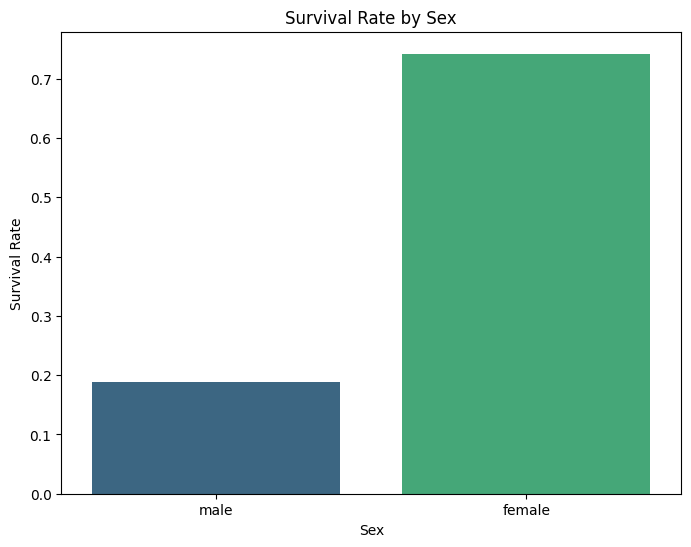

In [31]:
# Calculate survival rates by Sex
survival_by_sex = train.groupby('Sex')['Survived'].mean()
print("Survival rate by Sex:")
print(survival_by_sex)
print("\n")

# Plot survival rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train, ci=None, palette='viridis')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

Survival Rate by Age Group

Survival rate by Age Group:
AgeGroup
Baby        0.704545
Child       0.424242
Teenager    0.403226
Adult       0.355556
OldAdult    0.420495
Old         0.227273
Name: Survived, dtype: float64




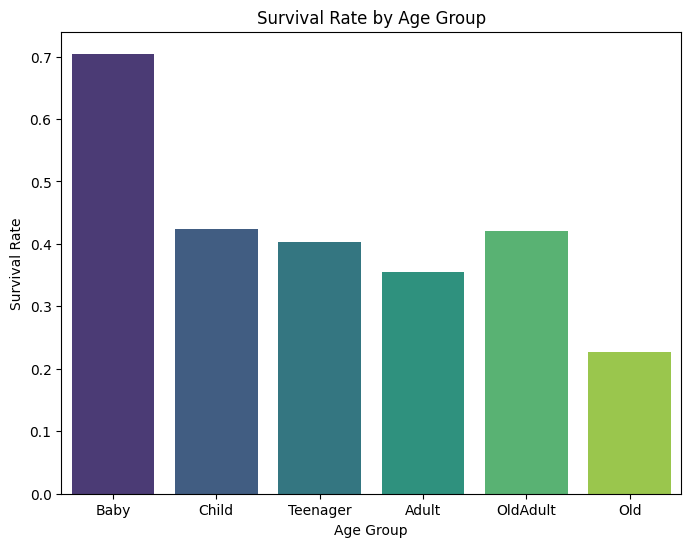

In [32]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
survival_by_age_group = train.groupby('AgeGroup')['Survived'].mean()
print("Survival rate by Age Group:")
print(survival_by_age_group)
print("\n")

# Plot survival rate by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train, ci=None, order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'], palette='viridis')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

Survival Rate by Passenger Class

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64




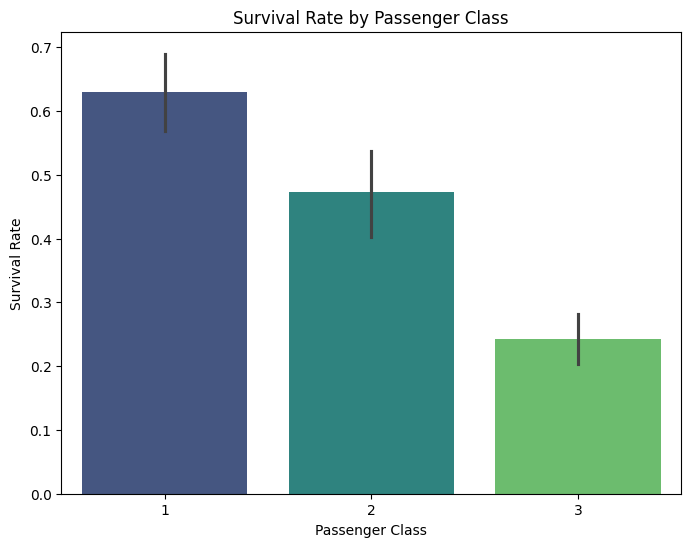

In [33]:
survival_by_pclass = train.groupby('Pclass')['Survived'].mean()
print("Survival rate by Pclass:")
print(survival_by_pclass)
print("\n")

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Survival Rate by Fare Group

16
Survival rate by Fare Group:
FareClass
Very Low     0.000000
Low          0.256236
Moderate     0.464646
Medium       0.419540
High         0.654206
Very High    0.727273
Luxury       0.777778
Name: Survived, dtype: float64


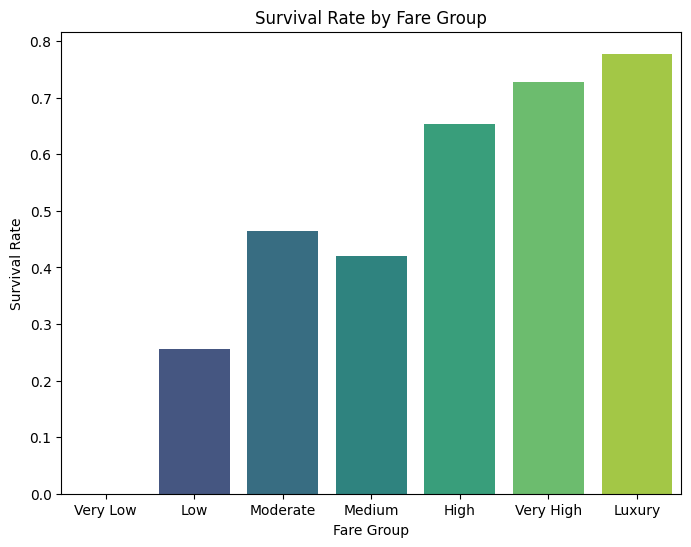

In [34]:
print((train['Fare'].values < 5).sum())

train['FareClass'] = pd.cut(train['Fare'], bins= [0, 5, 15, 25, 50, 100, 250, float('inf')],
                         labels=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'])
survival_by_fare = train.groupby('FareClass')['Survived'].mean()
print("Survival rate by Fare Group:")
print(survival_by_fare)

plt.figure(figsize=(8, 6))
sns.barplot(x='FareClass', y='Survived', data=train, ci=None, order=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'], palette='viridis')
plt.title('Survival Rate by Fare Group')
plt.ylabel('Survival Rate')
plt.xlabel('Fare Group')
plt.show()

### Data Preprocessing and Feature Engineering

In [40]:
#the function used in the preprocessing

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

def pre(df):

    df['Family'] = df['Parch'] + df['SibSp']
    
    # Extract titles from names
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                       'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Fill missing embarked with the most frequent value
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Fill missing fare with the median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Create fare classes
    df['Very Low'] = (df['Fare'] <= 4)
    df['Low'] = (df['Fare'] > 4) & (df['Fare'] <= 15)
    df['Moderate'] = (df['Fare'] > 15) & (df['Fare'] <= 25)
    df['Medium'] = (df['Fare'] > 25) & (df['Fare'] <= 50)
    df['High'] = (df['Fare'] > 50) & (df['Fare'] <= 100)
    df['Very High'] = (df['Fare'] > 100) & (df['Fare'] <= 250)
    df['Luxury'] = (df['Fare'] > 250)

    # Convert cabin to first letter and fill missing values with 'N'
    df['Cabin'] = df['Cabin'].fillna('N').map(lambda x: x[0])
    
    # Fill missing age with the median or using KNN Imputer
    age_imputer = KNNImputer(n_neighbors=5)
    df['Age'] = age_imputer.fit_transform(df[['Age']])
    
    # Create age categories
    df['Baby'] = (df['Age'] <= 5)
    df['Child'] = (df['Age'] > 5) & (df['Age'] <= 14)
    df['Teenager'] = (df['Age'] > 14) & (df['Age'] <= 18)
    df['Adult'] = (df['Age'] > 18) & (df['Age'] <= 30)
    df['OldAdult'] = (df['Age'] > 30) & (df['Age'] <= 60)
    df['Old'] = (df['Age'] > 60)
    df['Alone'] = df['Family'] == 0
    
    # One-hot encoding
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'Cabin'], drop_first=True)
    #in case there is a cabin that was not mentioned, create it and fill it with False
    for l in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
        col = f'Cabin_{l}'
        if col not in df.columns:
            df[col] = pd.Series([False]*df.shape[0])
            df[col].fillna(False, inplace=True)
    
    # Select relevant columns
    cols = ['Age', 'Fare', 'Family', 'Parch', 'SibSp', 'Alone', 'Pclass', 'Very Low', 'Low', 'Moderate', 'Medium',
       'High', 'Very High', 'Luxury', 'Baby', 'Child', 'Teenager',
       'Adult', 'OldAdult', 'Old', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T'] #Cabin_N was ignored
    df = df[cols].copy()
    
    # Scale numeric features
    numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    
    return df


### Modeling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#load the data again
train = pd.read_csv('d:/Shit/Datasets/train.csv')

# Perform data preprocessing and feature engineering (assuming you've already done this)
train_processed = pre(train)

# Define features and target variable
X = train_processed
y = train['Survived']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Dictionary to store results
results = {'Classifier': [], 'Test Accuracy': []}

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results['Classifier'].append(clf_name)
    results['Test Accuracy'].append(accuracy)

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display the results
results_df


,Classifier,Test Accuracy
0,Logistic Regression,0.798883
1,SVM,0.815642
2,KNN,0.804469
3,Random Forest,0.782123
4,Gradient Boosting,0.798883


In [50]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [0],
    'max_leaf_nodes': [None, 10, 20, 30],
    'class_weight': [None, {0: 1, 1: 1.5}],
    'ccp_alpha': [0.0, 0.0001, 0.001]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best Accuracy Score:")
print(grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)
    
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


Fitting 5 folds for each of 10368 candidates, totalling 51840 fits
Best Parameters found:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
Best Accuracy Score:
0.8455037919826651


0.7932960893854749

In [51]:
base_params = {
    'criterion': 'gini',
    'splitter': 'best',
    'max_depth': 10,
    'min_samples_split': 8,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'random_state': 0,
    'max_leaf_nodes': 84,
    'class_weight': {0: 1, 1: 1.5},
    'ccp_alpha': 4e-05
}

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for BaggingClassifier
param_grid_bagging = {
    'n_estimators': range(50, 351, 50),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Instantiate the base model
base_model = DecisionTreeClassifier(**base_params)

# Create BaggingClassifier
bagging_model = BaggingClassifier(estimator=base_model, random_state=0)

# Instantiate GridSearchCV
grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid_bagging, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_bagging.fit(X_train, y_train)

# Print the best parameters and best score
print("BaggingClassifier Best Parameters found:")
print(grid_search_bagging.best_params_)
print("BaggingClassifier Best Accuracy Score:")
print(grid_search_bagging.best_score_)

y_pred = grid_search_bagging.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy



Fitting 5 folds for each of 63 candidates, totalling 315 fits
BaggingClassifier Best Parameters found:
{'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 50}
BaggingClassifier Best Accuracy Score:
0.8412390426474934


0.7932960893854749

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': range(60, 361, 50),
    'max_features': ['sqrt', 'log2', None]
}

# Create RandomForestClassifier with the base parameters
rf_model = RandomForestClassifier(
    criterion=base_params['criterion'],
    max_depth=base_params['max_depth'],
    min_samples_split=base_params['min_samples_split'],
    min_samples_leaf=base_params['min_samples_leaf'],
    max_leaf_nodes=base_params['max_leaf_nodes'],
    class_weight=base_params['class_weight'],
    ccp_alpha=base_params['ccp_alpha'],
    random_state=1212
)

# Instantiate GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("RandomForestClassifier Best Parameters found:")
print(grid_search_rf.best_params_)
print("RandomForestClassifier Best Accuracy Score:")
print(grid_search_rf.best_score_)

y_pred = grid_search_rf.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy



Fitting 5 folds for each of 21 candidates, totalling 105 fits
RandomForestClassifier Best Parameters found:
{'max_features': None, 'n_estimators': 260}
RandomForestClassifier Best Accuracy Score:
0.8454840933714174


0.8156424581005587

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

# Define the parameter grid for ExtraTreesClassifier
param_grid_et = {
    'n_estimators': range(50, 351, 50),
    'max_features': ['sqrt', 'log2', None]
}

# Create ExtraTreesClassifier with the base parameters
et_model = ExtraTreesClassifier(
    criterion=base_params['criterion'],
    max_depth=base_params['max_depth'],
    min_samples_split=base_params['min_samples_split'],
    min_samples_leaf=base_params['min_samples_leaf'],
    max_leaf_nodes=base_params['max_leaf_nodes'],
    class_weight=base_params['class_weight'],
    ccp_alpha=base_params['ccp_alpha'],
    random_state=1212
)

# Instantiate GridSearchCV
grid_search_et = GridSearchCV(estimator=et_model, param_grid=param_grid_et, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_et.fit(X_train, y_train)

# Print the best parameters and best score
print("ExtraTreesClassifier Best Parameters found:")
print(grid_search_et.best_params_)
print("ExtraTreesClassifier Best Accuracy Score:")
print(grid_search_et.best_score_)

y_pred = grid_search_et.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy



Fitting 5 folds for each of 21 candidates, totalling 105 fits
ExtraTreesClassifier Best Parameters found:
{'max_features': 'sqrt', 'n_estimators': 100}
ExtraTreesClassifier Best Accuracy Score:
0.8300502314586822


0.7932960893854749

### Final Model

In [55]:
rf_model = RandomForestClassifier(
    n_estimators=110,
    max_depth=12,
    min_samples_split=8,
    min_samples_leaf=1,
    max_features=0.15,
    random_state=900,
    bootstrap=True
) 
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7988826815642458

In [57]:
train_processed = pre(train)

X = train_processed
y = train['Survived']

test_processed = pre(test)

ids = test['PassengerId']
X_t = test_processed

In [58]:
rf_model.fit(X, y)

preds = rf_model.predict(X_t)

ids = test['PassengerId']

PredictionDF = pd.DataFrame({'PassengerId' : ids, 'Survived' : preds})

PredictionDF.to_csv('final_submissions.csv', index=False)



In [59]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

pre_transformer = FunctionTransformer(pre, validate=False)

pipeline = Pipeline([
    ('preprocessor', pre_transformer),
    ('classifier', rf_model)
])

pipeline.fit(train, y)

# Save the pipeline to a pickle file
with open('Titanic_pipeline_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


In [60]:
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import warnings

warnings.filterwarnings("ignore")

with open('d:\Shit\codes\python files\Titanic_pipeline_model.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

preds = loaded_pipeline.predict(test)

ids = test['PassengerId']

PredictionDF = pd.DataFrame({'PassengerId' : ids, 'Survived' : preds})

PredictionDF.to_csv('final_submissions.csv', index=False)



In [66]:
pic = pd.read_pickle(r'd:\Shit\codes\python files\Titanic_pipeline_model.pkl')
pic

Pipeline(steps=[('preprocessor',
                 FunctionTransformer(func=<function pre at 0x000002074F209D00>)),
                ('classifier',
                 RandomForestClassifier(max_depth=12, max_features=0.15,
                                        min_samples_split=8, n_estimators=110,
                                        random_state=900))])